In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
%cd /content/drive/MyDrive/Fruits Dataset

/content/drive/MyDrive/Fruits Dataset


In [3]:
!unzip fruits.zip

Archive:  fruits.zip
   creating: fruits/
  inflating: __MACOSX/._fruits       
  inflating: fruits/.DS_Store        
  inflating: __MACOSX/fruits/._.DS_Store  
   creating: fruits/test/
   creating: fruits/train/
   creating: fruits/validation/
   creating: fruits/test/apple/
  inflating: fruits/test/.DS_Store   
  inflating: __MACOSX/fruits/test/._.DS_Store  
   creating: fruits/test/banana/
   creating: fruits/test/orange/
   creating: fruits/train/apple/
  inflating: fruits/train/.DS_Store  
  inflating: __MACOSX/fruits/train/._.DS_Store  
   creating: fruits/train/banana/
   creating: fruits/train/orange/
   creating: fruits/validation/apple/
  inflating: fruits/validation/.DS_Store  
  inflating: __MACOSX/fruits/validation/._.DS_Store  
   creating: fruits/validation/banana/
   creating: fruits/validation/orange/
  inflating: fruits/test/apple/Screen Shot 2018-06-08 at 5.27.19 PM.png  
  inflating: __MACOSX/fruits/test/apple/._Screen Shot 2018-06-08 at 5.27.19 PM.png  
  inflatin

In [18]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [19]:
img_height, img_width = 32, 32
batch_size = 20

train_ds = tf.keras.utils.image_dataset_from_directory(
    "fruits/train",
    image_size = (img_height, img_width),
    batch_size = batch_size
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    "fruits/test",
    image_size = (img_height, img_width),
    batch_size = batch_size
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    "fruits/validation",
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 460 files belonging to 3 classes.
Found 130 files belonging to 3 classes.
Found 66 files belonging to 3 classes.


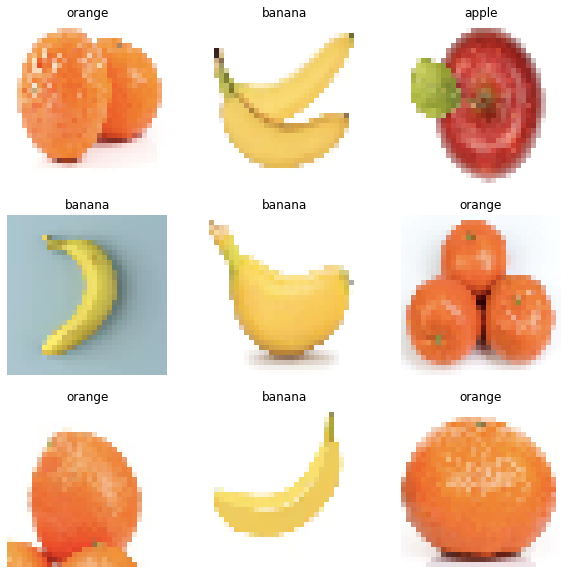

In [27]:
class_names = ['apple', 'banana', 'orange']
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3,3,i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [21]:
model = tf.keras.Sequential(
    [
     tf.keras.layers.Rescaling(1./255),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(128, activation="relu"),
     tf.keras.layers.Dense(3)
    ]
)

In [22]:
model.compile(
    optimizer="adam",
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [23]:
model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = 20
    )

Epoch 1/20
23/23 [==============================] - 4s 112ms/step - loss: 1.0148 - accuracy: 0.5283 - val_loss: 0.8274 - val_accuracy: 0.6818
Epoch 2/20
23/23 [==============================] - 3s 106ms/step - loss: 0.6561 - accuracy: 0.7370 - val_loss: 0.5952 - val_accuracy: 0.6970
Epoch 3/20
23/23 [==============================] - 3s 106ms/step - loss: 0.4497 - accuracy: 0.8043 - val_loss: 0.3493 - val_accuracy: 0.8636
Epoch 4/20
23/23 [==============================] - 3s 105ms/step - loss: 0.3451 - accuracy: 0.8674 - val_loss: 0.3786 - val_accuracy: 0.8636
Epoch 5/20
23/23 [==============================] - 3s 107ms/step - loss: 0.2564 - accuracy: 0.9043 - val_loss: 0.2924 - val_accuracy: 0.9091
Epoch 6/20
23/23 [==============================] - 3s 108ms/step - loss: 0.2116 - accuracy: 0.9174 - val_loss: 0.2487 - val_accuracy: 0.9242
Epoch 7/20
23/23 [==============================] - 3s 103ms/step - loss: 0.1745 - accuracy: 0.9435 - val_loss: 0.2706 - val_accuracy: 0.9091
Epoch 

In [24]:
model.evaluate(test_ds)

7/7 [==============================] - 1s 8ms/step - loss: 0.1166 - accuracy: 0.9538


[0.11663138121366501, 0.9538461565971375]

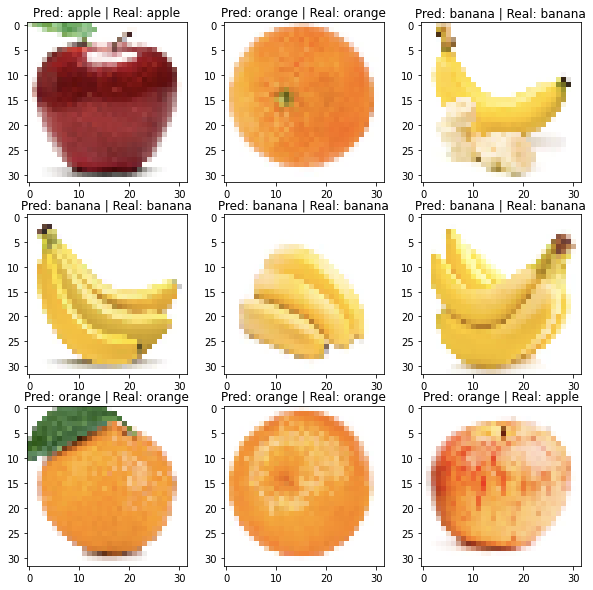

In [30]:
import numpy as np

plt.figure(figsize=(10,10))
for images, labels in test_ds.take(1):
  classifications = model(images)
  # print(classifications)
  for i in range(9):
    ax = plt.subplot(3,3,i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    index = np.argmax(classifications[i])
    plt.title("Pred: " + class_names[index] + " | Real: " + class_names[labels[i]])

In [33]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("model.tflite", "wb") as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmptnj30dmn/assets


INFO:tensorflow:Assets written to: /tmp/tmptnj30dmn/assets
